In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from google.colab import files
from tensorflow.keras.models import load_model

# Load the dataset
raw_data = pd.read_excel('/content/drive/MyDrive/iPad/Notes/Διάφορα/Solar 25th Cycle Prediction/All_Data_Stitched.xlsx')

# Data preprocessing
columns_to_keep = ['Year', 'Month', 'Sunspots_Smoothed','Sunspots_Raw','THUL_Smoothed']
new_data = raw_data.loc[:, columns_to_keep]
new_data['Date'] = pd.to_datetime(new_data[['Year', 'Month']].assign(day=1))
new_data.drop(['Year', 'Month'], axis=1, inplace=True)

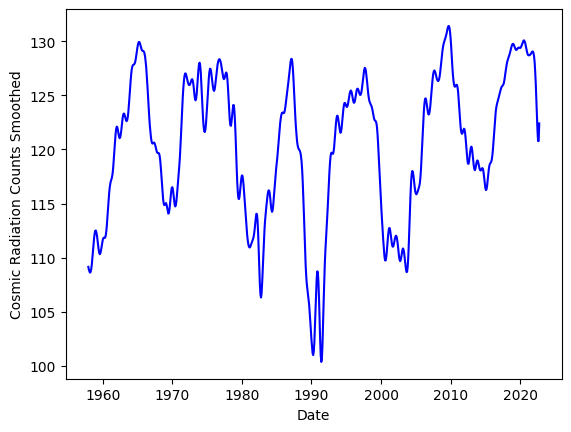

In [9]:
plt.plot(new_data['Date'], new_data['THUL_Smoothed'], color='blue')
plt.xlabel('Date')
plt.ylabel('Cosmic Radiation Counts Smoothed')
#plt.title("Raw Sunspot Number")
plt.show()

In [7]:
raw_data.head()

,Unnamed: 0,Year,Month,Cycle Number,Sunspots_Raw,Sunspots_Smoothed,Sunspots_ReSmoothed,Solar_Radio_Flux_at_10_7cm_Raw,Solar_Radio_Flux_at_10_7cm_Smoothed,THUL_Smoothed,Shift
0,0,1957,12,19,339.0,307.177730,274.686463,268.554839,250.235466,109.150977,0.475650
1,1,1958,1,19,286.7,293.783008,276.819767,243.454839,243.632957,108.891968,0.459157
2,2,1958,2,19,233.6,279.224905,278.372695,199.664286,237.835277,108.704364,0.439566
3,3,1958,3,19,270.0,266.924650,278.893724,249.193548,233.742530,108.616760,0.421546
4,4,1958,4,19,277.6,259.102579,278.060786,247.543333,231.608667,108.677512,0.409008
